### Part A

In [ ]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [24]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

from sklearn.exceptions import NotFittedError
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import matplotlib.pyplot as plt

In [25]:
d_train = pd.read_csv('/content/CE802_P3_Data.csv')

In [3]:
d_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-69.21,16536.84,6,Europe,-16720.42,735.74,22.14,15.48,Medium,124.05,1618.89,-1.19,4.20,158.97,2741.60,1012.86,2285.10,-14982.14,-27.00,0.90,624.84,-75.30,-23473.86,-3567.57,52.27,12,-95.04,-506.31,-3077.82,15.35,-53.04,-112.43,-2537.30,4.06,40.32,3.18,2697.84
1,-168.67,28434.21,12,UK,-8070.93,91.35,-1.86,18.60,Very high,57.78,1137.78,-9.45,6.26,274.47,3318.00,24.15,1434.80,-11318.10,-42.96,5.62,350.19,-53.07,-17670.66,1130.10,134.50,4,-62.18,-731.28,-4559.70,20.74,-36.44,-44.06,-2384.48,33.52,176.98,5.81,3632.57
2,-76.19,22895.97,18,Europe,-12126.02,145.64,-68.28,14.22,High,-65.88,2065.89,-9.65,-8.56,254.70,1402.74,1519.80,3339.20,-23039.76,-36.39,2.78,512.10,-71.82,-20750.98,-13063.68,16.83,8,-274.11,-355.08,-3965.13,16.65,-76.06,-81.66,-2225.42,28.90,165.00,2.85,2257.40
3,-103.19,22926.51,12,Europe,-10050.95,218.39,-40.58,14.99,Very high,132.12,3228.42,-10.63,-1.12,159.48,3226.36,1080.42,2361.38,-13324.14,-42.69,12.58,395.64,-63.39,-16415.90,-15996.18,75.62,4,-947.62,-518.52,-1509.87,21.99,-128.34,-142.53,-1320.10,1.12,211.88,2.96,1785.03
4,-49.84,-4224.12,6,Rest,-10197.84,-346.17,-47.04,8.92,High,113.31,1678.11,-8.72,9.28,255.21,1772.30,-74.49,2556.04,-25230.76,-37.89,9.06,415.80,-69.63,-17479.94,-2976.36,73.94,8,-495.81,-576.60,-1907.67,14.10,72.98,-75.83,-2019.04,8.16,154.32,2.92,1063.23


Preprocessing

In [ ]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   int64  
 3   F4      1500 non-null   object 
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   object 
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [ ]:
d_train.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
F35       0
F36       0
Target    0
dtype: int64

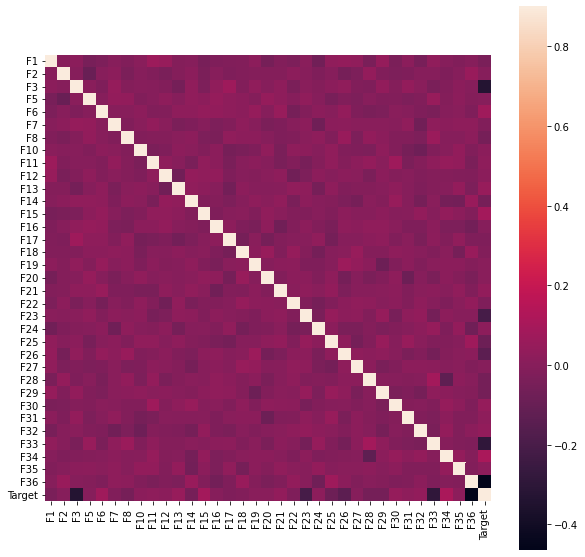

In [5]:
plt.figure(figsize = (10,10))
corr = d_train.corr()
#sns.heatmap(corr, annot = True)
sns.heatmap(corr, vmax=0.9, square=True)

In [6]:
d_train['F4'].value_counts()

Europe    393
UK        378
Rest      365
USA       364
Name: F4, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


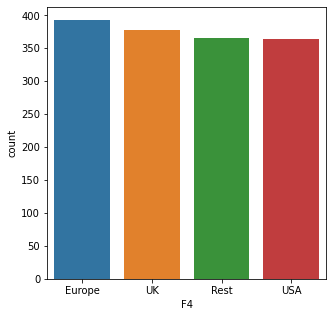

In [7]:
plt.figure(figsize=(5,5)) 
sns.countplot(d_train.F4)

In [ ]:
d_train['F9'].value_counts()

High         307
Very low     307
Very high    306
Medium       294
Low          286
Name: F9, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


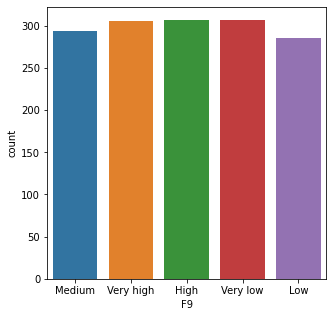

In [ ]:
plt.figure(figsize=(5,5)) 
sns.countplot(d_train.F9)

In [26]:
# Boolean variables cast implicitly to integers in python, however still it is better to
# convert the boolean Class to numeric for better performance. 

#d_train = pd.get_dummies(d_train)
le = LabelEncoder()
d_train['F4'] = le.fit_transform(d_train['F4'])
d_train['F9'] = le.fit_transform(d_train['F9'])
d_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-69.21,16536.84,6,0,-16720.42,735.74,22.14,15.48,2,124.05,1618.89,-1.19,4.20,158.97,2741.60,1012.86,2285.10,-14982.14,-27.00,0.90,624.84,-75.30,-23473.86,-3567.57,52.27,12,-95.04,-506.31,-3077.82,15.35,-53.04,-112.43,-2537.30,4.06,40.32,3.18,2697.84
1,-168.67,28434.21,12,2,-8070.93,91.35,-1.86,18.60,3,57.78,1137.78,-9.45,6.26,274.47,3318.00,24.15,1434.80,-11318.10,-42.96,5.62,350.19,-53.07,-17670.66,1130.10,134.50,4,-62.18,-731.28,-4559.70,20.74,-36.44,-44.06,-2384.48,33.52,176.98,5.81,3632.57
2,-76.19,22895.97,18,0,-12126.02,145.64,-68.28,14.22,0,-65.88,2065.89,-9.65,-8.56,254.70,1402.74,1519.80,3339.20,-23039.76,-36.39,2.78,512.10,-71.82,-20750.98,-13063.68,16.83,8,-274.11,-355.08,-3965.13,16.65,-76.06,-81.66,-2225.42,28.90,165.00,2.85,2257.40
3,-103.19,22926.51,12,0,-10050.95,218.39,-40.58,14.99,3,132.12,3228.42,-10.63,-1.12,159.48,3226.36,1080.42,2361.38,-13324.14,-42.69,12.58,395.64,-63.39,-16415.90,-15996.18,75.62,4,-947.62,-518.52,-1509.87,21.99,-128.34,-142.53,-1320.10,1.12,211.88,2.96,1785.03
4,-49.84,-4224.12,6,1,-10197.84,-346.17,-47.04,8.92,0,113.31,1678.11,-8.72,9.28,255.21,1772.30,-74.49,2556.04,-25230.76,-37.89,9.06,415.80,-69.63,-17479.94,-2976.36,73.94,8,-495.81,-576.60,-1907.67,14.10,72.98,-75.83,-2019.04,8.16,154.32,2.92,1063.23


In [32]:
scaler = MinMaxScaler()
d_train = pd.DataFrame(scaler.fit_transform(d_train), index=d_train.index, columns=d_train.columns)

In [27]:
#scaler = StandardScaler()
#d_train = pd.DataFrame(scaler.fit_transform(d_train), index=d_train.index, columns=d_train.columns)

In [33]:
d_train

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,0.536355,0.362054,0.181818,0.000000,0.213420,0.718836,0.549064,0.547886,0.50,0.523984,0.601291,0.732094,0.559011,0.512773,0.705086,0.569386,0.449645,0.471831,0.4985,0.023295,0.737156,0.545018,0.287874,0.525576,0.522673,0.6,0.531825,0.617918,0.586061,0.555034,0.440158,0.362176,0.430040,0.000089,0.278271,0.155182,0.825431
1,0.263974,0.569534,0.363636,0.666667,0.605953,0.399926,0.490885,0.622403,0.75,0.417382,0.535167,0.559616,0.587615,0.715565,0.847577,0.383764,0.274218,0.565104,0.2325,0.154187,0.511569,0.732423,0.430942,0.598989,0.732043,0.2,0.550050,0.425686,0.470478,0.681530,0.457372,0.689933,0.463915,0.000738,0.425259,0.307470,0.968743
2,0.517239,0.472952,0.545455,0.000000,0.421924,0.426794,0.329875,0.517793,0.00,0.218463,0.662726,0.555440,0.381838,0.680853,0.374109,0.664560,0.667119,0.266714,0.3420,0.075430,0.644556,0.574355,0.355002,0.377173,0.432438,0.4,0.432507,0.747142,0.516853,0.585543,0.416288,0.509684,0.499173,0.000636,0.412373,0.136074,0.757904
3,0.443297,0.473484,0.363636,0.000000,0.516095,0.462798,0.397023,0.536183,0.75,0.536966,0.822504,0.534976,0.485143,0.513669,0.824923,0.582070,0.465383,0.514037,0.2370,0.347199,0.548900,0.645422,0.461875,0.331345,0.582126,0.2,0.058957,0.607485,0.708357,0.710866,0.362077,0.217881,0.699853,0.000025,0.462796,0.142444,0.685480
4,0.589402,0.000000,0.181818,0.333333,0.509429,0.183396,0.381363,0.391211,0.00,0.506708,0.609430,0.574859,0.629547,0.681749,0.465468,0.365246,0.505544,0.210940,0.3170,0.249584,0.565458,0.592817,0.435643,0.534815,0.577849,0.4,0.309545,0.557857,0.677330,0.525698,0.570833,0.537632,0.544921,0.000180,0.400886,0.140127,0.574815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.587594,0.513664,0.272727,0.333333,0.489741,0.580511,0.440512,0.531407,1.00,0.482338,0.361897,0.586761,0.477090,0.610113,0.501708,0.695808,0.456157,0.306692,0.5760,0.462008,0.468817,0.527820,0.561575,0.600356,0.547753,0.4,0.515790,0.545527,0.466503,0.614175,0.515191,0.652205,0.612507,0.000078,0.423086,0.262884,0.412820
1496,0.365959,0.654575,0.727273,1.000000,0.642641,0.677937,0.576990,0.566277,0.00,0.408262,0.640758,0.566507,0.439322,0.725099,0.471999,0.730649,0.515172,0.183380,0.4890,0.247366,0.500136,0.555387,0.565485,0.655571,0.440917,0.5,0.477382,0.556575,0.550316,0.757099,0.495075,0.548754,0.497950,0.000013,0.484329,0.339896,0.310524
1497,0.640038,0.466064,0.363636,0.000000,0.455496,0.248204,0.522157,0.522809,0.50,0.379500,0.681173,0.513468,0.662316,0.455254,0.483697,0.429408,0.490289,0.627679,0.4940,0.235164,0.613582,0.733687,0.310735,0.306074,0.558498,0.4,0.440610,0.729351,0.506387,0.400610,0.517016,0.582934,0.649340,0.000001,0.408200,0.077591,0.464337
1498,0.541175,0.455925,0.545455,0.666667,0.579205,0.667816,0.568942,0.565321,0.25,0.486777,0.471950,0.562539,0.417106,0.426705,0.609253,0.381821,0.443266,0.557245,0.6765,0.071547,0.640786,0.575873,0.270565,0.476693,0.567257,0.1,0.370488,0.538811,0.503869,0.319643,0.528194,0.704938,0.509352,0.001414,0.612795,0.258830,0.778692


In [ ]:
# #Outliers Analysis
# Q1 = d_train.quantile(0.25)
# Q3 = d_train.quantile(0.75)
# IQR = Q3 - Q1
# outlier_constant = [0.5, 1.5, 2.0]
# for cons in outlier_constant:
#     data_out = d_train[~((d_train < (Q1 - cons * IQR)) |(d_train > (Q3 + cons * IQR))).any(axis=1)]
#     print(data_out.shape)
#     print(f'{d_train.shape[0] - data_out.shape[0]} outliers removed from {d_train.shape[0]} with constant {cons}')

In [34]:
x = d_train.drop(['Target'], axis = 1)
y = d_train['Target']

print(x.shape)
print(y.shape) 

(1500, 36)
(1500,)


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size= 0.3, random_state=42)

Regression

In [36]:
#Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
R2 = r2_score(y_test,y_pred)
print('RMSE',rmse,'\n','R2', R2)

RMSE 0.1334909570521689 
 R2 0.4784994743531421


In [ ]:
#Pipeline Technique 
pipelines={'rf':make_pipeline(RandomForestRegressor(random_state=42)),
           'gb':make_pipeline(GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)),
           'ridge':make_pipeline(Ridge(random_state=1234)),
           'lasso':make_pipeline(Lasso(random_state=1234)),
           'enet':make_pipeline(ElasticNet(random_state=1234))}


In [ ]:
hyperparagrid={'rf':{
                    'randomforestregressor__min_samples_split':[2,4,6],
                   # 'randomforestregressor__min_samples_leaf':[1,2,3]
                     },
               'gb':{'gradientboostingregressor__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]},
               'ridge':{'ridge__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]},
               'lasso':{'lasso__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]},
               'enet':{'elasticnet__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]}
               }

In [ ]:
fit_models={}
for algo,pipeline in pipelines.items():
    model=GridSearchCV(pipeline,hyperparagrid[algo],cv=10,n_jobs=-1)
    try:
        print('Start training for {}'.format(algo))
        model.fit(x_train,y_train)
        fit_models[algo]=model
    except NotFittedError as e:
        print(repr(e))


Start training for rf
Start training for gb
Start training for ridge
Start training for lasso
Start training for enet


In [ ]:
R_score_results=[]
alg = []
for algo,model in fit_models.items():
    ya=model.predict(x_test)
    mse = mean_squared_error(y_test, ya)
    rmse = np.sqrt(mse)
    print('{} scores-R2:{} RMSE:{}\n'.format(algo,r2_score(y_test,ya), rmse))
    alg.append(algo)
    R_score_results.append(r2_score(y_test,ya))
#print(alg)
#print(R_score_results)

rf scores-R2:0.5819152251176283 RMSE:0.11952442075256817

gb scores-R2:0.7886558767984397 RMSE:0.08498055428714323

ridge scores-R2:0.47467417398086076 RMSE:0.13397965263993075

lasso scores-R2:0.4736521815204293 RMSE:0.13410991433389136

enet scores-R2:0.47973066116220375 RMSE:0.1333332875820494



[0.5819152251176283, 0.7886558767984397, 0.47467417398086076, 0.4736521815204293, 0.47973066116220375]


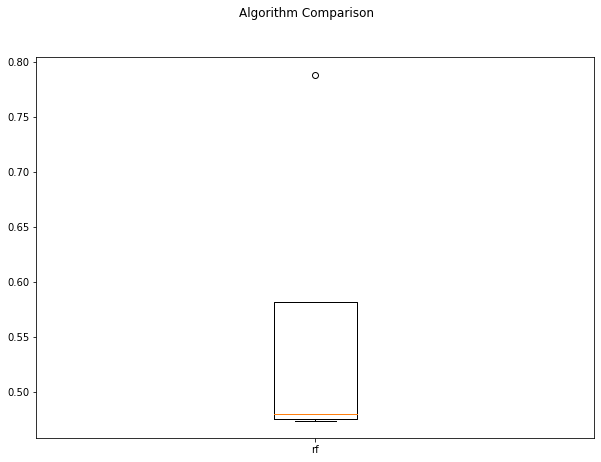

In [ ]:
print(R_score_results)
#boxplot algorithm comparison
fig = plt.figure(figsize=(10,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(R_score_results)
ax.set_xticklabels(alg)
plt.show()

# fig = plt.figure(figsize=(10,7))
# fig.suptitle('Algorithm Comparison')
# for i in R_score_results:
#     plt.boxplot(i)
# plt.show()

In [ ]:
GB = fit_models['gb']
#print(GB)
GB.fit(x,y)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('gradientboostingregressor',
                                        GradientBoostingRegressor(learning_rate=0.05,
                                                                  loss='huber',
                                                                  max_depth=4,
                                                                  max_features='sqrt',
                                                                  min_samples_leaf=15,
                                                                  min_samples_split=10,
                                                                  n_estimators=3000,
                                                                  random_state=5))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__alpha': [0.001, 0.005,
                                                              0.01, 0.05, 0.1,
                                                      

### Part B

In [ ]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('/content/CE802_P3_Test.csv')
#test_df
le = LabelEncoder()
test_df['F4'] = le.fit_transform(test_df['F4'])
test_df['F9'] = le.fit_transform(test_df['F9'])
# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
#print(test_data)
#predicted = ... # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...
predicted = GB.predict(test_data)
print(np.shape(predicted))
# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('/content/CE802_P3_Test.csv').iloc[:,:1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:1])

(1500,)
